<a href="https://colab.research.google.com/github/HanaAdzania/UAS-Datmin-2022/blob/main/UAS_Datmin_Kelompok_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project UAS Datmin - Topik : Piala Dunia 2022

Kelompok 12 :
1. Alfia Choirun Nisa (1906299414)
2. Gaby Fionna Yossudarso (1906375650)
3. Hana Adzania Nufaisah (1906377776)
4. Nabila Safitri (1906299540)
5. Rahmi Radhia Khalqi (1906375796)
6. Tesalonicca Talitha (1906377826)

# Outline Laporan Project Akhir

*   Pendahuluan
*   Import Module dan Scraping Data Twitter
*   Import Data
*   Exploratory Data Analysis (Visualisasi Teks)
*   Topic Modelling
*   Analisis Sentimen
*   Social Network Analysis
*   Kesimpulan dan Insight
*   Catatan : Peran & Kontribusi Anggota Kelompok 
*   Link Presentasi Kelompok : https://drive.google.com/file/d/1--KaF8vfi0y9aBAy55OL-_nbCtlKSP2C/view?usp=drivesdk















# Import Module dan Scraping Data Twitter

In [ ]:
"""
Installing Modules & getting the necessary files for "Google Colab"
Jika dijalankan di komputer lokal (PC/Laptop) silahkan unduh secara manual dan 
lakukan instalasi module di terminal/command prompt 
"""
import nltk

!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/corpus_sederhana.txt
!wget -P / https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/lib/taudataNlpTm.py
!pip install unidecode textblob sastrawi
nltk.download('popular')

--2022-12-30 07:03:38--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29041 (28K) [text/plain]
Saving to: ‘data/slang.txt’

slang.txt           100%[===================>]  28.36K  --.-KB/s    in 0.003s  

2022-12-30 07:03:39 (9.18 MB/s) - ‘data/slang.txt’ saved [29041/29041]

--2022-12-30 07:03:39--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6446 (6.

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'Done'

'Done'

In [ ]:
pip install --upgrade git+https://github.com/kevctae/twint.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-yru7j_mv
  Running command git clone -q https://github.com/kevctae/twint.git /tmp/pip-req-build-yru7j_mv
     |████████████████████████████████| 265 kB 6.8 MB/s 
     |████████████████████████████████| 385 kB 39.1 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
     |████████████████████████████████| 288 kB 73.6 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 59 kB 6.2 MB/s 
     |████████████████████████████████| 140 kB 68.7 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=39180 sha256=df5be9fee663fa7d7fc156777f407e0d7c89360dc9dd6f87c5c261a85811545f
  Stored in directory: /tmp/pip-ephem-wheel-cache-3e6wpbe3/wheels/de/66/ce/1d0e7f533048436bc24ec9d2d55bc759542faa4fe80bc0b9

In [ ]:
pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import twint
import nest_asyncio
import pandas as pd

nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True
"Done"

'Done'

In [ ]:
config.Search = "Piala dunia 2022"
config.Limit = 13000
config.Lang = "id"
config.Since = "2022-11-20" #Diambil dari tanggal babak penyisihan dimulai
config.Until = "2022-12-21" #Hingga 3 hari setelah piala dunia 2022 selesai

twint.run.Search(config)
data = twint.storage.panda.Tweets_df
del twint, config, nest_asyncio
print(data.shape)

data.tail()

(13016, 38)


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
13011,1604096863367577603,1604096863367577603,1.671281e+12,2022-12-17 12:51:09,+0000,,Suporter Maroko Dan Prancis Rusuh Usai Laga Se...,in,"[maroko, prancis, marokovsprancis, pialadunia2...",[],...,,,,,,[],,,,
13012,1604096854538715138,1604096854538715138,1.671281e+12,2022-12-17 12:51:07,+0000,,"Prediksi, Kroasia Bakal Mendominasi Maroko Dip...",in,"[hakimziyech, kroasia, maroko, pialadunia2022]",[],...,,,,,,[],,,,
13013,1604096594604802049,1604096594604802049,1.671281e+12,2022-12-17 12:50:05,+0000,,New post: Pendukung Maroko Ingin Tim Kesayanga...,in,[],[],...,,,,,,[],,,,
13014,1604096401322885120,1604096401322885120,1.671281e+12,2022-12-17 12:49:19,+0000,,Tebak siapa yg jadi top skor piala dunia Qata...,in,[],[],...,,,,,,[],,,,
13015,1604096012750311424,1604096012750311424,1.671281e+12,2022-12-17 12:47:46,+0000,,🛑 LINK STREAMING POSISI KETIGA PIALA DUNIA 202...,in,"[croatiavsmorocco, kroasiavsmaroko, maroko, fi...",[],...,,,,,,[],,,,


In [ ]:
data.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1605351395921518592,1605351395921518592,1.671581e+12,2022-12-20 23:56:13,+0000,,Para pemain Timnas Maroko beserta Ibunya diund...,in,[],[],...,,,,,,[],,,,
1,1605351093357383682,1605351093357383682,1.671581e+12,2022-12-20 23:55:01,+0000,,"Update Ranking FIFA Usai Piala Dunia 2022, Arg...",in,"[fifaworldcup, pialadunia2022]",[],...,,,,,,[],,,,
2,1605349357468979200,1605349357468979200,1.671580e+12,2022-12-20 23:48:07,+0000,,Messi mencetak rekor baru di Instagram. Postin...,in,[],[],...,,,,,,[],,,,
3,1605348993567162368,1605345350000443393,1.671580e+12,2022-12-20 23:46:40,+0000,,@FaktaSepakbola Perjalanan Timnas Maroko di Pi...,in,[],[],...,,,,,,"[{'screen_name': 'FaktaSepakbola', 'name': 'Fa...",,,,
4,1605347784911048705,1605345350000443393,1.671580e+12,2022-12-20 23:41:52,+0000,,"@FaktaSepakbola Dari 4 besar piala Dunia 2022,...",in,[],[],...,,,,,,"[{'screen_name': 'FaktaSepakbola', 'name': 'Fa...",,,,


In [ ]:
df = data[['tweet']]
df.at[100,'tweet']


'Profil Pedro Guilherme, Striker Flamengo Masuk Skuad Timnas Brasil untuk Piala Dunia 2022, Sikut Roberto Firmino  https://t.co/jloCiTBR8l'

In [ ]:
data.to_csv('data_pialadunia1.csv',index=False, encoding='utf8')#Menyimpan file data dan akan diupload ke github
'Done'

'Done'

# Import Data yang Sudah Di Scraping

In [ ]:
#Import Data yang Sudah Disimpan/Di Scraping Sebelumnya (Sehingga Tidak Perlu Melakukan Scraping Kembali)
data = pd.read_csv('https://raw.githubusercontent.com/HanaAdzania/UAS-Datmin-2022/main/data_pialadunia1.csv',low_memory = False, encoding='utf8')
data.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.60535E+18,1.60535E+18,1.67158E+12,20/12/2022 23:56,0.0,NaN,Para pemain Timnas Maroko beserta Ibunya diund...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.60535E+18,1.60535E+18,1.67158E+12,20/12/2022 23:55,0.0,NaN,"Update Ranking FIFA Usai Piala Dunia 2022, Arg...",in,"['fifaworldcup', 'pialadunia2022']",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.60535E+18,1.60535E+18,1.67158E+12,20/12/2022 23:48,0.0,NaN,Messi mencetak rekor baru di Instagram. Postin...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.60535E+18,1.60535E+18,1.67158E+12,20/12/2022 23:46,0.0,NaN,@FaktaSepakbola Perjalanan Timnas Maroko di Pi...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'FaktaSepakbola', 'name': 'Fa...",NaN,NaN,NaN,NaN
4,1.60535E+18,1.60535E+18,1.67158E+12,20/12/2022 23:41,0.0,NaN,"@FaktaSepakbola Dari 4 besar piala Dunia 2022,...",in,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'FaktaSepakbola', 'name': 'Fa...",NaN,NaN,NaN,NaN


# Exploratory Data Analysis (Visualisasi Teks)

### Pre-Processing

In [ ]:
#Kami hanya mengambil kolom Tweet untuk dilakukan visualisasi teks
dfawal = data[['id','tweet']]

In [ ]:
dfawal

,id,tweet
0,1.60535E+18,Para pemain Timnas Maroko beserta Ibunya diund...
1,1.60535E+18,"Update Ranking FIFA Usai Piala Dunia 2022, Arg..."
2,1.60535E+18,Messi mencetak rekor baru di Instagram. Postin...
3,1.60535E+18,@FaktaSepakbola Perjalanan Timnas Maroko di Pi...
4,1.60535E+18,"@FaktaSepakbola Dari 4 besar piala Dunia 2022,..."
...,...,...
13015,1.60413E+18,Link Live Streaming Maroko Vs Kroasia di Piala...
13016,1.60413E+18,🛑 Link Live Streaming 17 DESEMBER 2022 *Pereb...
13017,1.60413E+18,Jagoan pemain PSMS Medan di partai final Piala...
13018,1.60413E+18,Final Piala Dunia 2022 antara Argentina vs Pra...


In [ ]:
# Mendefinisikan df sebagai dataframe
df  = pd.DataFrame(dfawal[['id', 'tweet']])

In [ ]:
#remove user twitter
def remove_pattern(cuitan, pattern):
    r = re.findall(pattern, cuitan)
    for i in r:
        cuitan = re.sub(i, '', cuitan)
    return cuitan  
df['remove_user'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [ ]:
df.head()

,id,tweet,remove_user
0,1.60535E+18,Para pemain Timnas Maroko beserta Ibunya diund...,Para pemain Timnas Maroko beserta Ibunya diund...
1,1.60535E+18,"Update Ranking FIFA Usai Piala Dunia 2022, Arg...","Update Ranking FIFA Usai Piala Dunia 2022, Arg..."
2,1.60535E+18,Messi mencetak rekor baru di Instagram. Postin...,Messi mencetak rekor baru di Instagram. Postin...
3,1.60535E+18,@FaktaSepakbola Perjalanan Timnas Maroko di Pi...,Perjalanan Timnas Maroko di Piala Dunia 2022 ...
4,1.60535E+18,"@FaktaSepakbola Dari 4 besar piala Dunia 2022,...","Dari 4 besar piala Dunia 2022, cuma prancis k..."


In [ ]:
#remove angka 0 sampai 9, kalimat retweet, tanda #
def remove(cuitan):
    #remove angka
    cuitan = re.sub('[0-9]+', '', cuitan)
    
    # remove stock market tickers like $GE
    cuitan = re.sub(r'\$\w*', '', cuitan)
 
    # remove old style retweet text "RT"
    cuitan = re.sub(r'^RT[\s]+', '', cuitan)

    # remove hashtags
    # only removing the hash # sign from the word
    cuitan = re.sub(r'#', '', cuitan)
    
    return cuitan
df['remove_awal'] = df['remove_user'].apply(lambda x: remove(x))

In [ ]:
df

,id,tweet,remove_user,remove_awal
0,1.60535E+18,Para pemain Timnas Maroko beserta Ibunya diund...,Para pemain Timnas Maroko beserta Ibunya diund...,Para pemain Timnas Maroko beserta Ibunya diund...
1,1.60535E+18,"Update Ranking FIFA Usai Piala Dunia 2022, Arg...","Update Ranking FIFA Usai Piala Dunia 2022, Arg...","Update Ranking FIFA Usai Piala Dunia , Argenti..."
2,1.60535E+18,Messi mencetak rekor baru di Instagram. Postin...,Messi mencetak rekor baru di Instagram. Postin...,Messi mencetak rekor baru di Instagram. Postin...
3,1.60535E+18,@FaktaSepakbola Perjalanan Timnas Maroko di Pi...,Perjalanan Timnas Maroko di Piala Dunia 2022 ...,Perjalanan Timnas Maroko di Piala Dunia posi...
4,1.60535E+18,"@FaktaSepakbola Dari 4 besar piala Dunia 2022,...","Dari 4 besar piala Dunia 2022, cuma prancis k...","Dari besar piala Dunia , cuma prancis kyknya..."
...,...,...,...,...
13015,1.60413E+18,Link Live Streaming Maroko Vs Kroasia di Piala...,Link Live Streaming Maroko Vs Kroasia di Piala...,Link Live Streaming Maroko Vs Kroasia di Piala...
13016,1.60413E+18,🛑 Link Live Streaming 17 DESEMBER 2022 *Pereb...,🛑 Link Live Streaming 17 DESEMBER 2022 *Pereb...,🛑 Link Live Streaming DESEMBER *Perebutan j...
13017,1.60413E+18,Jagoan pemain PSMS Medan di partai final Piala...,Jagoan pemain PSMS Medan di partai final Piala...,Jagoan pemain PSMS Medan di partai final Piala...
13018,1.60413E+18,Final Piala Dunia 2022 antara Argentina vs Pra...,Final Piala Dunia 2022 antara Argentina vs Pra...,Final Piala Dunia antara Argentina vs Prancis...


In [ ]:
#Menghapus baris yang berisi kata sama
df.drop_duplicates(subset ="remove_awal", keep = 'first', inplace = True)

In [ ]:
df

,id,tweet,remove_user,remove_awal
0,1.60535E+18,Para pemain Timnas Maroko beserta Ibunya diund...,Para pemain Timnas Maroko beserta Ibunya diund...,Para pemain Timnas Maroko beserta Ibunya diund...
1,1.60535E+18,"Update Ranking FIFA Usai Piala Dunia 2022, Arg...","Update Ranking FIFA Usai Piala Dunia 2022, Arg...","Update Ranking FIFA Usai Piala Dunia , Argenti..."
2,1.60535E+18,Messi mencetak rekor baru di Instagram. Postin...,Messi mencetak rekor baru di Instagram. Postin...,Messi mencetak rekor baru di Instagram. Postin...
3,1.60535E+18,@FaktaSepakbola Perjalanan Timnas Maroko di Pi...,Perjalanan Timnas Maroko di Piala Dunia 2022 ...,Perjalanan Timnas Maroko di Piala Dunia posi...
4,1.60535E+18,"@FaktaSepakbola Dari 4 besar piala Dunia 2022,...","Dari 4 besar piala Dunia 2022, cuma prancis k...","Dari besar piala Dunia , cuma prancis kyknya..."
...,...,...,...,...
13015,1.60413E+18,Link Live Streaming Maroko Vs Kroasia di Piala...,Link Live Streaming Maroko Vs Kroasia di Piala...,Link Live Streaming Maroko Vs Kroasia di Piala...
13016,1.60413E+18,🛑 Link Live Streaming 17 DESEMBER 2022 *Pereb...,🛑 Link Live Streaming 17 DESEMBER 2022 *Pereb...,🛑 Link Live Streaming DESEMBER *Perebutan j...
13017,1.60413E+18,Jagoan pemain PSMS Medan di partai final Piala...,Jagoan pemain PSMS Medan di partai final Piala...,Jagoan pemain PSMS Medan di partai final Piala...
13018,1.60413E+18,Final Piala Dunia 2022 antara Argentina vs Pra...,Final Piala Dunia 2022 antara Argentina vs Pra...,Final Piala Dunia antara Argentina vs Prancis...


In [ ]:
#Mengimport acuan file yang berisi slang
import pandas as pd
df_slang = pd.read_csv('https://raw.githubusercontent.com/HanaAdzania/UAS-Datmin-2022/main/twitter_dict_1.csv',low_memory = False, encoding='utf8')
df_slang.head()

,slang,formal
0,&,dan
1,@,di
2,1pun,satupun
3,22nya,dua-duanya
4,7an,tujuan


In [ ]:
#Mengubah kalimat yang mengandung kata slang
def replace_slang(cuitan):
    cuitan = cuitan.lower()
    res = ''
    for item in cuitan.split():
        if item in df_slang.slang.values:
            res += df_slang[df_slang['slang'] == item]['formal'].iloc[0]
        else:
            res += item
        res += ' '
    return res

In [ ]:
df['no slang'] = df['remove_awal'].apply(lambda x: replace_slang(x))
df[['remove_awal','no slang']].head()

,remove_awal,no slang
0,Para pemain Timnas Maroko beserta Ibunya diund...,para pemain timnas maroko beserta ibunya diund...
1,"Update Ranking FIFA Usai Piala Dunia , Argenti...","update ranking fifa usai piala dunia , argenti..."
2,Messi mencetak rekor baru di Instagram. Postin...,messi mencetak rekor baru di instagram. postin...
3,Perjalanan Timnas Maroko di Piala Dunia posi...,perjalanan timnas maroko di piala dunia positi...
4,"Dari besar piala Dunia , cuma prancis kyknya...","dari besar piala dunia , hanya prancis kayakny..."


In [ ]:
#Mengimport stopword
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Menggunakan 2 acuan stopwords
from nltk.corpus import stopwords 
stopwords_indonesia = stopwords.words('indonesian')
Sastrawi_StopWords_id = factory.get_stop_words()

In [ ]:
#Menampilkan isi dan banyak stopwords pada setiap acuan file
print(stopwords_indonesia)
print(Sastrawi_StopWords_id)
print(len(stopwords_indonesia))
print(len(Sastrawi_StopWords_id))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
#tokenize
from nltk.tokenize import TweetTokenizer
import string

In [ ]:
#Menghapus emoticon yang tertulis pada tweet
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

In [ ]:
def clean_tweets(cuitan):
 
    # remove hyperlinks
    cuitan = re.sub(r'https?:\/\/.*[\r\n]*', '', cuitan)
    
    #remove coma
    cuitan = re.sub(r',','',cuitan)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(cuitan)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean
df['tweet_clean'] = df['no slang'].apply(lambda x: clean_tweets(x))

In [ ]:
df

,id,tweet,remove_user,remove_awal,no slang,tweet_clean
0,1.60535E+18,Para pemain Timnas Maroko beserta Ibunya diund...,Para pemain Timnas Maroko beserta Ibunya diund...,Para pemain Timnas Maroko beserta Ibunya diund...,para pemain timnas maroko beserta ibunya diund...,"[main, timnas, maroko, serta, ibu, undang, raj..."
1,1.60535E+18,"Update Ranking FIFA Usai Piala Dunia 2022, Arg...","Update Ranking FIFA Usai Piala Dunia 2022, Arg...","Update Ranking FIFA Usai Piala Dunia , Argenti...","update ranking fifa usai piala dunia , argenti...","[update, ranking, fifa, piala, dunia, argentin..."
2,1.60535E+18,Messi mencetak rekor baru di Instagram. Postin...,Messi mencetak rekor baru di Instagram. Postin...,Messi mencetak rekor baru di Instagram. Postin...,messi mencetak rekor baru di instagram. postin...,"[messi, cetak, rekor, instagram, postingan, me..."
3,1.60535E+18,@FaktaSepakbola Perjalanan Timnas Maroko di Pi...,Perjalanan Timnas Maroko di Piala Dunia 2022 ...,Perjalanan Timnas Maroko di Piala Dunia posi...,perjalanan timnas maroko di piala dunia positi...,"[jalan, timnas, maroko, piala, dunia, positif,..."
4,1.60535E+18,"@FaktaSepakbola Dari 4 besar piala Dunia 2022,...","Dari 4 besar piala Dunia 2022, cuma prancis k...","Dari besar piala Dunia , cuma prancis kyknya...","dari besar piala dunia , hanya prancis kayakny...","[piala, dunia, prancis, kayak, parade, macam, ..."
...,...,...,...,...,...,...
13015,1.60413E+18,Link Live Streaming Maroko Vs Kroasia di Piala...,Link Live Streaming Maroko Vs Kroasia di Piala...,Link Live Streaming Maroko Vs Kroasia di Piala...,link live streaming maroko vs kroasia di piala...,"[link, live, streaming, maroko, vs, kroasia, p..."
13016,1.60413E+18,🛑 Link Live Streaming 17 DESEMBER 2022 *Pereb...,🛑 Link Live Streaming 17 DESEMBER 2022 *Pereb...,🛑 Link Live Streaming DESEMBER *Perebutan j...,🛑 link live streaming desember *perebutan juar...,"[, link, live, streaming, desember, rebut, jua..."
13017,1.60413E+18,Jagoan pemain PSMS Medan di partai final Piala...,Jagoan pemain PSMS Medan di partai final Piala...,Jagoan pemain PSMS Medan di partai final Piala...,jagoan pemain psms medan di partai final piala...,"[jago, main, psms, medan, partai, final, piala..."
13018,1.60413E+18,Final Piala Dunia 2022 antara Argentina vs Pra...,Final Piala Dunia 2022 antara Argentina vs Pra...,Final Piala Dunia antara Argentina vs Prancis...,final piala dunia antara argentina vs prancis ...,"[final, piala, dunia, argentina, vs, prancis, ..."


In [ ]:
#remove punct (menghapus tanda kurung siku, tanda baca dll)
def remove_punct(cuitan):
    cuitan  = " ".join([char for char in cuitan if char not in string.punctuation])
    return cuitan
df['Tweet Fix'] = df['tweet_clean'].apply(lambda x: remove_punct(x))

In [ ]:
df

,id,tweet,remove_user,remove_awal,no slang,tweet_clean,Tweet Fix
0,1.60535E+18,Para pemain Timnas Maroko beserta Ibunya diund...,Para pemain Timnas Maroko beserta Ibunya diund...,Para pemain Timnas Maroko beserta Ibunya diund...,para pemain timnas maroko beserta ibunya diund...,"[main, timnas, maroko, serta, ibu, undang, raj...",main timnas maroko serta ibu undang raja marok...
1,1.60535E+18,"Update Ranking FIFA Usai Piala Dunia 2022, Arg...","Update Ranking FIFA Usai Piala Dunia 2022, Arg...","Update Ranking FIFA Usai Piala Dunia , Argenti...","update ranking fifa usai piala dunia , argenti...","[update, ranking, fifa, piala, dunia, argentin...",update ranking fifa piala dunia argentina pran...
2,1.60535E+18,Messi mencetak rekor baru di Instagram. Postin...,Messi mencetak rekor baru di Instagram. Postin...,Messi mencetak rekor baru di Instagram. Postin...,messi mencetak rekor baru di instagram. postin...,"[messi, cetak, rekor, instagram, postingan, me...",messi cetak rekor instagram postingan menang t...
3,1.60535E+18,@FaktaSepakbola Perjalanan Timnas Maroko di Pi...,Perjalanan Timnas Maroko di Piala Dunia 2022 ...,Perjalanan Timnas Maroko di Piala Dunia posi...,perjalanan timnas maroko di piala dunia positi...,"[jalan, timnas, maroko, piala, dunia, positif,...",jalan timnas maroko piala dunia positif banget...
4,1.60535E+18,"@FaktaSepakbola Dari 4 besar piala Dunia 2022,...","Dari 4 besar piala Dunia 2022, cuma prancis k...","Dari besar piala Dunia , cuma prancis kyknya...","dari besar piala dunia , hanya prancis kayakny...","[piala, dunia, prancis, kayak, parade, macam, ...",piala dunia prancis kayak parade macam argenti...
...,...,...,...,...,...,...,...
13015,1.60413E+18,Link Live Streaming Maroko Vs Kroasia di Piala...,Link Live Streaming Maroko Vs Kroasia di Piala...,Link Live Streaming Maroko Vs Kroasia di Piala...,link live streaming maroko vs kroasia di piala...,"[link, live, streaming, maroko, vs, kroasia, p...",link live streaming maroko vs kroasia piala du...
13016,1.60413E+18,🛑 Link Live Streaming 17 DESEMBER 2022 *Pereb...,🛑 Link Live Streaming 17 DESEMBER 2022 *Pereb...,🛑 Link Live Streaming DESEMBER *Perebutan j...,🛑 link live streaming desember *perebutan juar...,"[, link, live, streaming, desember, rebut, jua...",link live streaming desember rebut juara piala...
13017,1.60413E+18,Jagoan pemain PSMS Medan di partai final Piala...,Jagoan pemain PSMS Medan di partai final Piala...,Jagoan pemain PSMS Medan di partai final Piala...,jagoan pemain psms medan di partai final piala...,"[jago, main, psms, medan, partai, final, piala...",jago main psms medan partai final piala dunia ...
13018,1.60413E+18,Final Piala Dunia 2022 antara Argentina vs Pra...,Final Piala Dunia 2022 antara Argentina vs Pra...,Final Piala Dunia antara Argentina vs Prancis...,final piala dunia antara argentina vs prancis ...,"[final, piala, dunia, argentina, vs, prancis, ...",final piala dunia argentina vs prancis saji du...


In [ ]:
#Sorting nilai
df.sort_values("Tweet Fix", inplace = True)

In [ ]:
df[:80]

,id,tweet,remove_user,remove_awal,no slang,tweet_clean,Tweet Fix
203,1.6052E+18,https://t.co/3IIQgxUaze Apa yang dilakukan p...,https://t.co/3IIQgxUaze Apa yang dilakukan p...,https://t.co/IIQgxUaze Apa yang dilakukan pe...,https://t.co/iiqgxuaze apa yang dilakukan pese...,[],
4712,1.60466E+18,https://t.co/AD91s2Sx9M Lionel Messi membawa ...,https://t.co/AD91s2Sx9M Lionel Messi membawa ...,https://t.co/ADsSxM Lionel Messi membawa Arge...,https://t.co/adssxm lionel messi membawa argen...,[],
787,1.60511E+18,https://t.co/wPPmSZpEC4 Sukses Argentina jua...,https://t.co/wPPmSZpEC4 Sukses Argentina jua...,https://t.co/wPPmSZpEC Sukses Argentina juar...,https://t.co/wppmszpec sukses argentina juara ...,[],
8049,1.60452E+18,https://t.co/sKjxuft3X4 Sebagian fans tidak ...,https://t.co/sKjxuft3X4 Sebagian fans tidak ...,https://t.co/sKjxuftX Sebagian fans tidak da...,https://t.co/skjxuftx sebagian fan tidak dapat...,[],
4631,1.60467E+18,https://t.co/k3KOrxRmDQ - Argentina Juara Pia...,https://t.co/k3KOrxRmDQ - Argentina Juara Pia...,https://t.co/kKOrxRmDQ - Argentina Juara Pial...,https://t.co/kkorxrmdq - argentina juara piala...,[],
...,...,...,...,...,...,...,...
11590,1.6043E+18,https://t.co/FcHqQs0u4a: Kroasia Raih Juara k...,https://t.co/FcHqQs0u4a: Kroasia Raih Juara k...,https://t.co/FcHqQsua: Kroasia Raih Juara ke-...,https://t.co/fchqqsua: kroasia raih juara ke- ...,[],
226,1.6052E+18,https://t.co/LLC8stTZjn - Hadiah Piala Dunia ...,https://t.co/LLC8stTZjn - Hadiah Piala Dunia ...,https://t.co/LLCstTZjn - Hadiah Piala Dunia ...,https://t.co/llcsttzjn - hadiah piala dunia sa...,[],
227,1.6052E+18,https://t.co/LLC8stTZjn - Sah Argentina Juara...,https://t.co/LLC8stTZjn - Sah Argentina Juara...,https://t.co/LLCstTZjn - Sah Argentina Juara ...,https://t.co/llcsttzjn - sah argentina juara p...,[],
3008,1.60476E+18,https://t.co/0pfhsfZVUS Kiper Argentina Dianc...,https://t.co/0pfhsfZVUS Kiper Argentina Dianc...,https://t.co/pfhsfZVUS Kiper Argentina Dianca...,https://t.co/pfhsfzvus kiper argentina diancam...,[],


In [ ]:
#Memunculkan hanya kolom Tweet Fix
df.drop(df.columns[[0,1,2,3,4,5]], axis = 1, inplace = True)

In [ ]:
df[:80]

,Tweet Fix
203,
4712,
787,
8049,
4631,
...,...
11590,
226,
227,
3008,


In [63]:
#Menghapus baris yang kosong
df.drop_duplicates(subset ="Tweet Fix", keep = 'first', inplace = True)

In [64]:
df

,Tweet Fix
203,
9284,a finale arg fra hadap laga puncak piala dunia...
3243,a trophy carries dust memories last forever ma...
4967,aa raya menang argentina pialadunia
7663,aaa argentina menanggg pialadunia argentina
...,...
3976,zaman surabaya prestasi argentina baik empat f...
2287,zaskia adya mecca cerita seru tonton bareng pi...
5613,zee keluarga nge dukung timnas argentina juara...
9452,zidane pakai adidas warna emas final piala dun...


In [65]:
#Tweet yang sudah beres, langsung diubah ke dalam csv
df[['Tweet Fix']].to_csv("Tweet Bersih.txt", index=False, encoding='utf8', header=False)

###Visualisasi Menggunakan Voyant

Akan dilakukan visualisasi data dengan menggunakan bantuan aplikasi voyant, sebagai berikut :

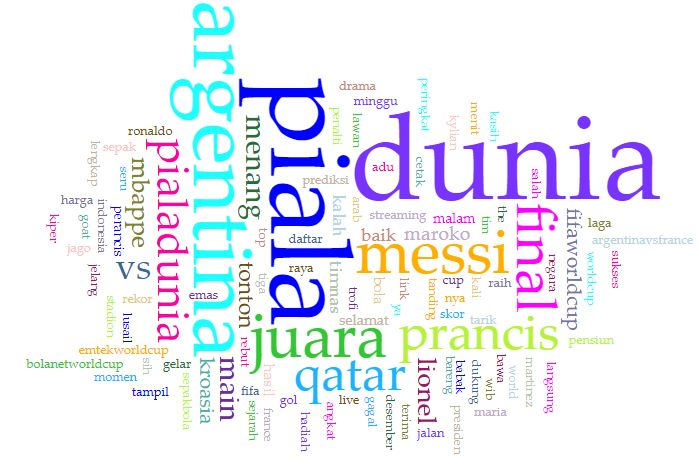

Berdasarkan wordcloud tersebut dapat diketahui kata yang sering diperbincangkan orang di twitter :
*   Argentina dan Prancis merupakan negara yang paling sering diperbincangkan saat baabk final piala dunia
*   Dari semua pemain kesebelasan tim Argentina dan Prancis, Messi dan Mbappe merupakan pemain yang paling mendominasi diperbincangkan netizen.



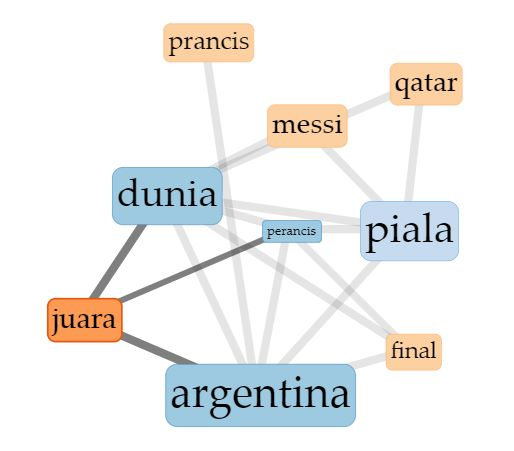

Dari grafik di atas, didapatkan bahwa dalam hal kandidat juara, netizen lebih banyak mengaitkan Argentina sebagai pemenangnya dibandingkan Prancis. Hal ini dapat dilihat dari garis hubung yang lebih tebal antara "Juara" dan "Argentina" dibandingkan "Juara" dan "Prancis"

# Topic Modelling

## Import Data

In [66]:
# Pada Topic Modelling atau Soft Clustering, akan digunakan data yang telah dibersihkan pada penyimpanan df, dengan kolom Tweet Fix dari bagian sebelumnya
df

,Tweet Fix
203,
9284,a finale arg fra hadap laga puncak piala dunia...
3243,a trophy carries dust memories last forever ma...
4967,aa raya menang argentina pialadunia
7663,aaa argentina menanggg pialadunia argentina
...,...
3976,zaman surabaya prestasi argentina baik empat f...
2287,zaskia adya mecca cerita seru tonton bareng pi...
5613,zee keluarga nge dukung timnas argentina juara...
9452,zidane pakai adidas warna emas final piala dun...


## Pre-processing data untuk melihat topik optimal

In [67]:
# Input data dan tokenisasi data
def cleaning_tweets(cuitan):
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(cuitan)
 
    tweets_cleaning = []    
    for word in tweet_tokens:
            stem_word = stemmer.stem(word) # stemming word
            tweets_cleaning.append(stem_word)
    return tweets_cleaning
df2 = df['Tweet Fix'].apply(lambda x: cleaning_tweets(x))

In [68]:
# Menyesuaikan bentuk data dari object menjadi list
df['Tweet Opt'] = list(df2)
df

,Tweet Fix,Tweet Opt
203,,[]
9284,a finale arg fra hadap laga puncak piala dunia...,"[a, finale, arg, fra, hadap, laga, puncak, pia..."
3243,a trophy carries dust memories last forever ma...,"[a, trophy, carries, dust, memories, last, for..."
4967,aa raya menang argentina pialadunia,"[aa, raya, menang, argentina, pialadunia]"
7663,aaa argentina menanggg pialadunia argentina,"[aaa, argentina, menanggg, pialadunia, argentina]"
...,...,...
3976,zaman surabaya prestasi argentina baik empat f...,"[zaman, surabaya, prestasi, argentina, baik, e..."
2287,zaskia adya mecca cerita seru tonton bareng pi...,"[zaskia, adya, mecca, cerita, seru, tonton, ba..."
5613,zee keluarga nge dukung timnas argentina juara...,"[zee, keluarga, nge, dukung, timnas, argentina..."
9452,zidane pakai adidas warna emas final piala dun...,"[zidane, pakai, adidas, warna, emas, final, pi..."


## Topik optimal

In [69]:
from gensim.models import Phrases
from gensim.corpora.dictionary import Dictionary

In [70]:
# Membuat dictionary representatif dari data
# Menghapus token yang jarang dan sering
dictionary_t = Dictionary(df2)
dictionary_t.filter_extremes(no_below=2, no_above=0.90)
# Membuat dictionary dan corpus yang dibutuhkan untuk Topic Modeling
corpus_t = [dictionary_t.doc2bow(doc) for doc in df2]
corpus_t = [t for t in corpus_t if t] # remove empty corpus
print('Number of unique tokens: %d' % len(dictionary_t))
print('Number of documents: %d' % len(corpus_t))
print(corpus_t[:1])

Number of unique tokens: 4783
Number of documents: 10840
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]]


In [71]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(df2)
id2word

In [72]:
# Mencari Coherence Values
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(id2word, corpus, texts, limit=1, start=2, step=1):
    coherence_values = []
    for num_topics in range(start, limit, step):
        LDAmodel_ = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
        cm = CoherenceModel(model=LDAmodel_, texts=texts, corpus=corpus, coherence='c_v')
        with np.errstate(invalid='ignore'):
            coherence_values.append(cm.get_coherence())
    return coherence_values

In [73]:
# Tahap Cross-validasi
start, step, limit = 2, 1, 10
coh_t, kCV = [], 10 

print('iterasi ke: ', end = ' ')
for i in range(kCV):
    print(i+1, end = ', ', flush=True)
    c = compute_coherence_values(id2word, corpus_t, df2, limit=limit, start=start, step=step)
    coh_t.append(c)
    
coherence_t = np.mean(np.array(coh_t), axis=0)
'Done'

iterasi ke:  1, 

2, 

3, 

4, 

5, 

6, 

7, 

8, 

9, 

10, 

'Done'

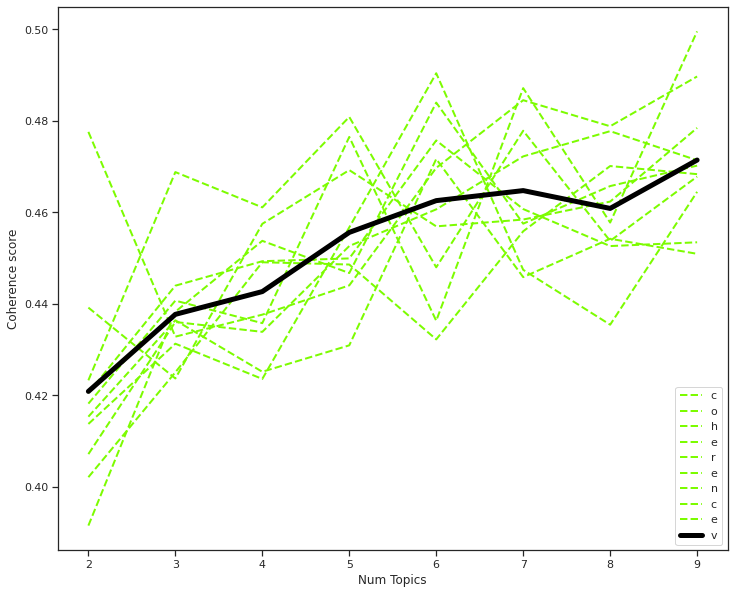

In [74]:
# Menunjukkan Grafik
x = range(start, limit, step)
plt.figure(figsize=(12,10))
for c in coh_t:
    plt.plot(x, c, '--', color = 'lawngreen', linewidth = 2)
plt.plot(x, coherence_t, '-', color = 'black', linewidth = 5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## Membuat VSM

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary = False, lowercase = True)
vsm = vectorizer.fit_transform(df['Tweet Fix'])
print(vsm.shape)

(10846, 10237)


## Membuat model LDA

In [76]:
# Akan dibentuk model Latent Dirichlet Allocation (LDA) dengan komponennya berupa 3 topik utama
from sklearn.decomposition import LatentDirichletAllocation as LDA 
n_topics = 5
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(vsm)
lda

LatentDirichletAllocation(n_components=5, random_state=0)

## Pembagian topik

In [77]:
# Tweet yang telah dibentuk menjadi model LDA selanjutnya akan dilihat berdasarkan topik
vsm_topics = lda.transform(vsm)
print(vsm_topics.shape)
vsm_topics[:10]

(10846, 5)


array([[0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.01189528, 0.01218224, 0.6561132 , 0.0122948 , 0.30751447],
       [0.00873685, 0.00910176, 0.00886752, 0.85205293, 0.12124095],
       [0.03361176, 0.24131367, 0.65762623, 0.03364086, 0.03380748],
       [0.03348403, 0.03438715, 0.86481511, 0.03347211, 0.0338416 ],
       [0.01834628, 0.92610536, 0.01849879, 0.01873555, 0.01831403],
       [0.02894686, 0.02891119, 0.02910872, 0.88333802, 0.02969522],
       [0.02905658, 0.23408741, 0.67862769, 0.02910498, 0.02912334],
       [0.02533727, 0.02524048, 0.02584735, 0.89799185, 0.02558305],
       [0.02541773, 0.02520141, 0.02534135, 0.55913727, 0.36490225]])

100%|██████████| 10846/10846 [00:00<00:00, 545558.81it/s]


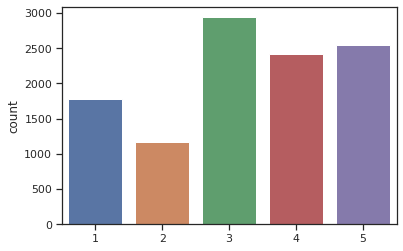

In [78]:
# Selanjutnya akan diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topik terbesar dari ketiga topik utama
doc_topic = [a.argmax()+1 for a in tqdm(vsm_topics)]
p = sns.countplot(x=doc_topic)

## Visualisasi

In [79]:
# Mengunduh dan menambahkan modul pyLDAvis
!pip install spacy unidecode textblob sastrawi pyLDAvis
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=bb599090f7bd2d6427a78afbe7b66535fb082ac6204951728d7d4e0c6c93541e
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=14cc68f3ccc6d350b85a17848d49876f2758792f8d90d1f5506db63126433aa1
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [80]:
# Membentuk Intertopic Distance Map interaktif menunjukkan hasil clustering dan kecenderungan pada 3 topik utama
pyLDAvis.sklearn.prepare(lda, vsm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.096838  0.077775       1        1  24.698410
4     -0.145517 -0.132885       2        1  23.636004
3     -0.029411  0.073146       3        1  22.189327
0      0.151422 -0.115860       4        1  16.134946
1     -0.073332  0.097823       5        1  13.341313, topic_info=              Term         Freq        Total Category  logprob  loglift
5761         messi  2990.000000  2990.000000  Default  30.0000  30.0000
7240       prancis  2418.000000  2418.000000  Default  29.0000  29.0000
2691         final  3225.000000  3225.000000  Default  28.0000  28.0000
9860            vs  1474.000000  1474.000000  Default  27.0000  27.0000
509      argentina  5725.000000  5725.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
7422         qatar   110.532475  2445.518638   Topic5  -5.1329  -1.0824
5603        mbappe    77.005313   898.617104   Topic5  -5.4944  -0.4427
2665  fifaworldcup    72.325056   849.328976   Topic5  -5.5571  -0.4490
5014         lawan    58.932585   291.289034   Topic5  -5.7619   0.4164
9320        timnas    63.505960   671.690211   Topic5  -5.6871  -0.3444

[353 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
36         4  0.957552       achraf
46         3  0.938585  adadikompas
76         1  0.011099          adu
76         2  0.832460          adu
76         3  0.155393          adu
...      ...       ...          ...
10108      5  0.320610           ya
10181      2  0.214982          yuk
10181      3  0.018694          yuk
10181      4  0.140206          yuk
10181      5  0.616904          yuk

[578 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 1, 2])

# Analisis Sentimen

Pertama, akan dilakukan pre-processing data terlebih dahulu untuk melakukan analisis sentimen

In [ ]:
#Data yang sebelumnya sudah discraping dari twitter, diupload ke github, lalu dirun melalui google colab 
#Import Data 
data = pd.read_csv('https://raw.githubusercontent.com/HanaAdzania/UAS-Datmin-2022/main/data_pialadunia1.csv',low_memory = False, encoding='utf8')
data.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.60535E+18,1.60535E+18,1.67158E+12,20/12/2022 23:56,0.0,NaN,Para pemain Timnas Maroko beserta Ibunya diund...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.60535E+18,1.60535E+18,1.67158E+12,20/12/2022 23:55,0.0,NaN,"Update Ranking FIFA Usai Piala Dunia 2022, Arg...",in,"['fifaworldcup', 'pialadunia2022']",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.60535E+18,1.60535E+18,1.67158E+12,20/12/2022 23:48,0.0,NaN,Messi mencetak rekor baru di Instagram. Postin...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.60535E+18,1.60535E+18,1.67158E+12,20/12/2022 23:46,0.0,NaN,@FaktaSepakbola Perjalanan Timnas Maroko di Pi...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'FaktaSepakbola', 'name': 'Fa...",NaN,NaN,NaN,NaN
4,1.60535E+18,1.60535E+18,1.67158E+12,20/12/2022 23:41,0.0,NaN,"@FaktaSepakbola Dari 4 besar piala Dunia 2022,...",in,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'FaktaSepakbola', 'name': 'Fa...",NaN,NaN,NaN,NaN


In [ ]:
#Akan dilakukan preprocessing untuk analisis sentimen 
Sastrawi_Stopwords_id=factory.get_stop_words()
Sastrawi_Stopwords_id=set(Sastrawi_Stopwords_id)
def cleanTextSA(txt):
    docx = unidecode(unescape(txt.lower().strip()))#merubah data ke huruf kecil semua
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    phonePattern = re.compile(r'\b\d{8,14}\b')
    docx=re.sub(phonePattern,'  ',docx)# clean phone
    #Tokens = TextBlob(docx).words # Tokenisasi 
    #docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    #docx = stemmer.stem(docx)
    #Dalam hal preprocessing Sentiment Analysis, sengaja tidak menggunakan stopword dan lemma untuk menghindari makna yang berbeda pada tweet yang sudah dibersihkan dengan sebelum
    return docx 
"Done"

'Done'

In [ ]:
#Mengaplikasikan langkah preprocessing di atas pada data
data['clean_tweet']=data['tweet'].apply(lambda t:cleanTextSA(t))
#Ingin dilihat hasil pre-processingnya, terlihat bahwa data sudah berupa huruf kecil semua, simbol sudah ter-remove
data[['tweet','clean_tweet']].head()

,tweet,clean_tweet
0,Para pemain Timnas Maroko beserta Ibunya diund...,para pemain timnas maroko beserta ibunya diund...
1,"Update Ranking FIFA Usai Piala Dunia 2022, Arg...",update ranking fifa usai piala dunia 2022 arg...
2,Messi mencetak rekor baru di Instagram. Postin...,messi mencetak rekor baru di instagram postin...
3,@FaktaSepakbola Perjalanan Timnas Maroko di Pi...,faktasepakbola perjalanan timnas maroko di pi...
4,"@FaktaSepakbola Dari 4 besar piala Dunia 2022,...",faktasepakbola dari 4 besar piala dunia 2022 ...


In [ ]:
#Pre-processing akan dilanjutkan dengan menangani slang pada data
#Berikut merupakan kumpulan/kamus slang(singkatan) beserta kata baku/kata sebenarnya
#Sumber : Website Tau Data dan https://github.com/afifai/analisis_twitter_dewakipas/find/master

df_slang = pd.read_csv('https://raw.githubusercontent.com/HanaAdzania/UAS-Datmin-2022/main/twitter_dict_1.csv',low_memory = False, encoding='utf8')

#Mendefinisikan fungsi replace slang
def replace_slang(tweets):
    tweets = tweets.lower()
    res = ''
    for item in tweets.split():
        if item in df_slang.slang.values:
            res += df_slang[df_slang['slang'] == item]['formal'].iloc[0]
        else:
            res += item
        res += ' '
    return res

In [ ]:
#Mengaplikasikan fungsi replace_slang pada data
data['clean_tweet'] = data.clean_tweet.apply(replace_slang)

#Menampilkan tampilan data yang sudah bersih
data[['tweet','clean_tweet']].head()

,tweet,clean_tweet
0,Para pemain Timnas Maroko beserta Ibunya diund...,para pemain timnas maroko beserta ibunya diund...
1,"Update Ranking FIFA Usai Piala Dunia 2022, Arg...",update ranking fifa usai piala dunia 2022 arge...
2,Messi mencetak rekor baru di Instagram. Postin...,messi mencetak rekor baru di instagram posting...
3,@FaktaSepakbola Perjalanan Timnas Maroko di Pi...,faktasepakbola perjalanan timnas maroko di pia...
4,"@FaktaSepakbola Dari 4 besar piala Dunia 2022,...",faktasepakbola dari 4 besar piala dunia 2022 h...


In [ ]:
#Lalu, akan dilakukan penyimpan file berisi data yang sudah bersih tersebut, untuk dilakukan pelabelan sentimen tweet

data['label']=''
data[['tweet','clean_tweet','label']].to_csv('data_SA_1.csv',index=False, encoding='utf8')
'Done'

'Done'

In [ ]:
#Import data tweet yang sudah dilabeli (3000 data)
#Label -1 : Negatif, 0: Netral, 1 : Positif
dataSA= pd.read_csv('https://raw.githubusercontent.com/HanaAdzania/UAS-Datmin-2022/main/datalabel.csv',low_memory = False, encoding='utf8')
print(dataSA.shape)

(3000, 3)


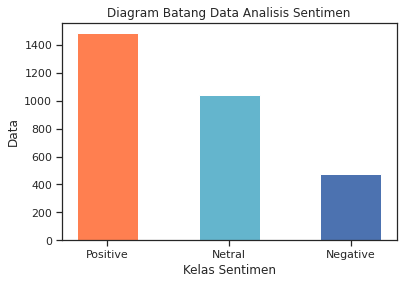

In [ ]:
#Untuk melihat sebaran jumlah masing-masing sentimen pada data, akan dibuat diagram batang 

labels = ['Positive','Netral','Negative']
Category1 = [1483,1044,473]
plt.bar(labels, Category1, tick_label=labels, width=0.5, color=['coral', 'c','b'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Batang Data Analisis Sentimen')
plt.show()

Dari diagram batang di atas, didapatkan bahwa sentimen atau tanggapan dari pihak individu, maupun non-individu (pemerintah, media) terhadap piala dunia 2022 cenderung positif apabila dibandingkan dengan tanggapan lainnya. Dari sudut pandang ekonomi, momen ini dapat dimanfaatkan untuk membentuk program atau promosi yang berhubungan dengan piala dunia 2022. Dari sudut pandang pihak penyelenggara/tuan rumah perlombaan (Qatar), akan lebih baik jika momen ini dimanfaatkan untuk makin mengenalkan Qatar pada dunia, (misal dari segi pariwisata dengan meningkatkan promosinya melalui media sosial, pelayanan, atau hiburan yang ada), sehingga diharapkan dapat mengundang lebih banyak para investor asing.

In [ ]:
#Akan dilakukan pemodelan analsis sentimen
#Membagi data menjadi data training dan testing terlebih dahulu
from sklearn.model_selection import train_test_split

seed = 99 # Biasakan menggunakan ini
testSize = 0.2

x_train, x_test, y_train, y_test = train_test_split(dataSA["clean_tweet"], dataSA["label"], 
                                                    test_size=testSize, random_state = seed)
print(x_train.shape, x_test.shape)

(2400,) (600,)


In [ ]:
#Akan digunakan algoritma TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vsm = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True, 
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

x_train = vsm.fit_transform(x_train) # "Fit_Transform"
x_test = vsm.transform(x_test) # Perhatikan disini hanya "Transform"

print(x_train.shape, x_test.shape) # Jumlah kolom Sama ==> ini penting

(2400, 8507) (600, 8507)


In [ ]:
#Document Classification~sentiment Analysis
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

#Model K-Nearest Neighbor
model = neighbors.KNeighborsClassifier()
kNN = model.fit(x_train, y_train)
y_kNN = kNN.predict(x_test)

print('Akurasi = ', accuracy_score(y_test, y_kNN))
print(confusion_matrix(y_test, y_kNN))
print(classification_report(y_test, y_kNN))

Akurasi =  0.5383333333333333
[[ 29  51   4]
 [  4 191  25]
 [  6 187 103]]
              precision    recall  f1-score   support

          -1       0.74      0.35      0.47        84
           0       0.45      0.87      0.59       220
           1       0.78      0.35      0.48       296

    accuracy                           0.54       600
   macro avg       0.66      0.52      0.51       600
weighted avg       0.65      0.54      0.52       600



Didapatkan akurasi sekitar 0.54 , maka dapat dikatakan model K-Nearest Neighbor yang dihasilkan kurang baik

In [ ]:
#Model Support Vector Machine
from sklearn import svm

dSVM = svm.SVC()
dSVM.fit(x_train, y_train)
y_SVM = dSVM.predict(x_test)
print('Akurasi = ', accuracy_score(y_test, y_SVM))
print(confusion_matrix(y_test, y_SVM))
print(classification_report(y_test, y_SVM))

Akurasi =  0.6833333333333333
[[ 36  19  29]
 [  3 122  95]
 [  4  40 252]]
              precision    recall  f1-score   support

          -1       0.84      0.43      0.57        84
           0       0.67      0.55      0.61       220
           1       0.67      0.85      0.75       296

    accuracy                           0.68       600
   macro avg       0.73      0.61      0.64       600
weighted avg       0.69      0.68      0.67       600



Didapatkan akurasi sekitar 0.68, maka dapat dikatakan model Support Vector Machine yang dihasilkan cukup  

In [ ]:
#Model Neural Network
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier()
NN.fit(x_train, y_train)
y_NN = NN.predict(x_test)

print('Akurasi = ', accuracy_score(y_test, y_NN))
print(confusion_matrix(y_test, y_NN))
print(classification_report(y_test, y_NN))

Akurasi =  0.6766666666666666
[[ 52  18  14]
 [ 12 138  70]
 [  5  75 216]]
              precision    recall  f1-score   support

          -1       0.75      0.62      0.68        84
           0       0.60      0.63      0.61       220
           1       0.72      0.73      0.72       296

    accuracy                           0.68       600
   macro avg       0.69      0.66      0.67       600
weighted avg       0.68      0.68      0.68       600



Didapatkan akurasi sekitar 0.68, maka dapat dikatakan model Neural Network yang dihasilkan cukup

Perhatikan bahwa dalam pembentukan model-model diatas, parameter yang digunakan adalah parameter default. Ingin dilakukan optimasi parameter untuk meningkatkan akurasi model, sebagai berikut :

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline 

In [ ]:
# Optimal parameter k-NN dengan GRIDSEARCH
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

x_train, x_test, y_train, y_test = train_test_split(dataSA["clean_tweet"], dataSA["label"], 
                                                    test_size=testSize, random_state = seed)
# Perhatikan kita pakai data awal : Text karena kita akan optimalkan preprocessing juga

kCV = 5
metric = 'accuracy'
params = {}
params['tfidfvectorizer__min_df'] = [5, 10, 15]
params['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
params['tfidfvectorizer__smooth_idf'] = [True] # [True, False]
params['tfidfvectorizer__sublinear_tf'] = [True] # [True, False]
params['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
params['kneighborsclassifier__n_neighbors'] = [3, 5, 10]
params['kneighborsclassifier__weights'] = ('distance', 'uniform')

pipe = make_pipeline(TfidfVectorizer(), neighbors.KNeighborsClassifier())
gridCV = GridSearchCV(pipe, params, cv=kCV, scoring=metric, verbose=1, n_jobs=-1) # , pre_dispatch='2*n_jobs', pre_dispatch min 2* n_jobs
gridCV.fit(x_train, y_train)
#Untuk melihat parameter optimal model dan feature enggineeringnya
print(gridCV.best_score_)
print(gridCV.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
0.6620833333333334
{'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance', 'tfidfvectorizer__max_df': 0.95, 'tfidfvectorizer__min_df': 5, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__sublinear_tf': True}



*   Dari hasil diatas, dilakukan cross validation dengan total 162 kandidat parameter dan menghasilkan 810 percobaan. 
*   Didapatkan bahwa parameter optimal modelnya memiliki jumlah neighbor 10, dengan weighting distance, feature engineering dengan max_df : 0,95 , min_df:5, tfidfvectorizer__ngram_range: (1, 1), tfidfvectorizer__smooth_idf bernilai True dan tfidfvectorizer__sublinear_tf' bernilai True.


In [ ]:
# Optimal parameter SVM dengan RandomSEARCH
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

pipeSVM = make_pipeline(TfidfVectorizer(), svm.SVC())
print(sorted(pipeSVM.get_params().keys()))

['memory', 'steps', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose', 'tfidfvectorizer', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvectorizer__max_df', 'tfidfvectorizer__max_features', 'tfidfvectorizer__min_df', 'tfidfvectorizer__ngram_range', 'tfidfvectorizer__norm', 'tfidfvectorizer__preprocessor', 'tfidfvectorizer__smooth_idf', 'tfidfvectorizer__stop_words', 'tfidfvectorizer__strip_accents', 'tfidfvectorizer__sublinear_tf', 'tfidfvectorizer__token_pattern', 'tfidfvectorizer__tokenizer', 'tfidfvectorizer__use_idf', 'tfidfvectorizer__vocabulary', 'verbose']


In [ ]:
# Optimal parameter SVM dengan RandomizedSearch

paramsSVM = {}
paramsSVM['tfidfvectorizer__min_df'] = [5, 10, 30]
paramsSVM['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
paramsSVM['tfidfvectorizer__smooth_idf'] = [True] # [True, False]
paramsSVM['tfidfvectorizer__sublinear_tf'] = [True] # [True, False]
paramsSVM['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
paramsSVM['svc__C'] = [0.1, 10, 100] #sp.stats.uniform(scale=1)
paramsSVM['svc__gamma'] = [1.0, 0.1, 0.001]
paramsSVM['svc__kernel'] = ['rbf', 'poly', 'sigmoid', 'linear']
paramsSVM['svc__decision_function_shape'] = ['ovo', 'ovr']

randsvmCV = RandomizedSearchCV(pipeSVM, paramsSVM, cv=kCV, scoring=metric, verbose=1, n_iter=30, random_state=seed, n_jobs=-1) # , pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
randsvmCV.fit(x_train, y_train)
#Untuk melihat parameter optimal model dan feature enggineeringnya
print(randsvmCV.best_score_)
print(randsvmCV.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.6766666666666666
{'tfidfvectorizer__sublinear_tf': True, 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__ngram_range': (1, 3), 'tfidfvectorizer__min_df': 5, 'tfidfvectorizer__max_df': 0.75, 'svc__kernel': 'rbf', 'svc__gamma': 1.0, 'svc__decision_function_shape': 'ovr', 'svc__C': 10}


*   Dari hasil diatas, dilakukan cross validation dengan total 30 kandidat parameter dan menghasilkan 150 percobaan. 
*   Interpretasi parameter optimal model dan feature engineering-nya similar dengan optimasi parameter K-NN dengan Grid Search. Perhatikan bahwa nilai feature engineering yang didapatkan melalui optimasi parameter SVM dengan Randomized Search  dan optimasi parameter K-NN dengan Grid Search berbeda. (Hal ini menunjukkan bahwa pada feature engineering, nilai optimalnya dapat berbeda-beda)

In [ ]:
# Optimal parameter ANN dengan RandomSEARCH
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

pipeNN = make_pipeline(TfidfVectorizer(), MLPClassifier())
print(sorted(pipeNN.get_params().keys()))

['memory', 'mlpclassifier', 'mlpclassifier__activation', 'mlpclassifier__alpha', 'mlpclassifier__batch_size', 'mlpclassifier__beta_1', 'mlpclassifier__beta_2', 'mlpclassifier__early_stopping', 'mlpclassifier__epsilon', 'mlpclassifier__hidden_layer_sizes', 'mlpclassifier__learning_rate', 'mlpclassifier__learning_rate_init', 'mlpclassifier__max_fun', 'mlpclassifier__max_iter', 'mlpclassifier__momentum', 'mlpclassifier__n_iter_no_change', 'mlpclassifier__nesterovs_momentum', 'mlpclassifier__power_t', 'mlpclassifier__random_state', 'mlpclassifier__shuffle', 'mlpclassifier__solver', 'mlpclassifier__tol', 'mlpclassifier__validation_fraction', 'mlpclassifier__verbose', 'mlpclassifier__warm_start', 'steps', 'tfidfvectorizer', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvectorizer__max_df', 'tfidfvectorizer__max_features', 'tfidfvector

In [ ]:
paramsNN = {}
paramsNN['tfidfvectorizer__min_df'] = [5, 10, 30]
paramsNN['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
paramsNN['tfidfvectorizer__smooth_idf'] = [True] # [True, False]
paramsNN['tfidfvectorizer__sublinear_tf'] = [True] # [True, False]
paramsNN['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
paramsNN['mlpclassifier__hidden_layer_sizes'] = [(5,10), (20,30), (30,50)] 
paramsNN['mlpclassifier__learning_rate'] = ['constant', 'invscaling', 'adaptive']
paramsNN['mlpclassifier__activation'] = ['logistic', 'tanh', 'relu' ]

randNnCV = RandomizedSearchCV(pipeNN, paramsNN, cv=kCV, scoring=metric, verbose=1, n_iter=30, random_state=seed, n_jobs=-1) # , pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
randNnCV.fit(x_train, y_train)
print(randNnCV.best_score_)
print(randNnCV.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.6641666666666668
{'tfidfvectorizer__sublinear_tf': True, 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__ngram_range': (1, 3), 'tfidfvectorizer__min_df': 5, 'tfidfvectorizer__max_df': 0.95, 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__hidden_layer_sizes': (5, 10), 'mlpclassifier__activation': 'logistic'}


*   Dari hasil diatas, dilakukan cross validation dengan total 30 kandidat parameter dan menghasilkan 150 percobaan. 
*   Interpretasi parameter optimal model dan feature engineering-nya similar dengan optimasi parameter K-NN dengan Grid Search. Perhatikan bahwa nilai feature engineering yang didapatkan melalui optimasi parameter NN dengan Randomized Search  dan optimasi parameter K-NN dengan Grid Search berbeda. (Hal ini menunjukkan bahwa pada feature engineering, nilai optimalnya dapat berbeda-beda)

In [ ]:
#Ingin dibandingkan nilai akurasi dari masing-masing model yang sudah dilakukan optimasi parameternya sebagai berikut:
knn_score = gridCV.cv_results_['mean_test_score'][:10]
svm_score = randsvmCV.cv_results_['mean_test_score'][:10]
ann_score = randNnCV.cv_results_['mean_test_score'][:10]

Accuracy kNN: 0.58 (+/- 0.02)
Accuracy SVM: 0.55 (+/- 0.11)
Accuracy NN: 0.64 (+/- 0.05)


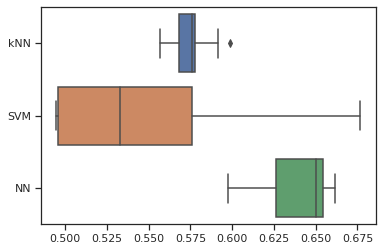

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

models = ['kNN', 'SVM', 'NN']
scores = [knn_score, svm_score, ann_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.show()

Perhatikan bahwa beberapa model yang dihasilkan tidak terlalu bagus, akan dilakukan pembentukan ensemble model sebagai berikut :

In [ ]:
#Ensemble Model
# Menggunakan Voting (Bagging) di Python
# Akan digunakan semua parameter optimal dari langkah sebelumnya
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

x_train, x_test, y_train, y_test = train_test_split(dataSA["clean_tweet"], dataSA["label"], 
                                                    test_size=testSize, random_state = seed)
                                                    
vsm = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True, 
                                   ngram_range=(1, 1), max_df=0.95, min_df=10)

x_train = vsm.fit_transform(x_train) # "Fit_Transform"
x_test = vsm.transform(x_test) # Perhatikan disini hanya "Transform"

kNN = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
SVM = svm.SVC(C=0.1, gamma=1, kernel='rbf', decision_function_shape='ovr', probability=True)
ann = MLPClassifier(hidden_layer_sizes=(5, 10), learning_rate='invscaling', activation='logistic')

ensemble = VotingClassifier(estimators=[('k-NN', kNN), ('SVM', SVM), ('ANN', ann)], voting='soft')#Menggunakan metode soft-ensemble, dipilih  karena metode ini mempertimbangkan probabilitas model
ensemble.fit(x_train, y_train)
y_ens = ensemble.score(x_test, y_test)

print('Akurasi k-NN = ', gridCV.best_score_)
print('Akurasi SVM = ', randsvmCV.best_score_)
print('Akurasi ANN = ', randNnCV.best_score_)
print('Akurasi Ensemble = ', y_ens)

Akurasi k-NN =  0.6620833333333334
Akurasi SVM =  0.6766666666666666
Akurasi ANN =  0.6641666666666668
Akurasi Ensemble =  0.6916666666666667


Berdasarkan perbandingan nilai akurasi beberapa model di atas, maka dipilih model ensemble karena memiliki nilai akurasi terbesar.

[[ 368   15    6]
 [   9  759   56]
 [   6   35 1146]]


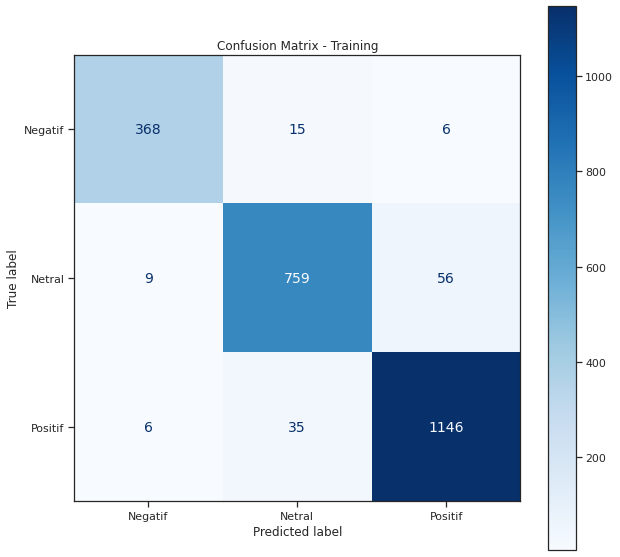

In [ ]:
#Selanjutnya, akan dianalisis lebih lanjut melalui confusion matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 14})
class_names = ["Negatif", "Netral", "Positif"]
disp = plot_confusion_matrix(ensemble, x_train, y_train, display_labels=class_names, cmap=plt.cm.Blues, ax=ax)# , normalize='true'
disp.ax_.set_title("Confusion Matrix - Training")
print(disp.confusion_matrix)

Dari confusion matrix dengan data training di atas, dapat dilihat melalui nilai diagonal matriks tersebut, bahwa nilai prediksi benar yang diberikan model ensemble sudah bagus. Data yang diprediksi benar sebanyak jumlah diagonalnya yaitu 2273, dengan jumlah sentimen yang paling banyak merupakan tweet dengan sentimen dengan label positif.Hal ini menunjukkan bahwa adanya kecenderungan tanggapan positif terhadap piala dunia 2022.

In [ ]:
# Dibandingkan dengan kesalahan dari training untuk memastikan overfitting tidak terjadi
# Model akan digunakan untuk memprediksi data testing :
ensemble_pred = ensemble.predict(x_test)
print(classification_report(y_test, ensemble_pred))

              precision    recall  f1-score   support

          -1       0.68      0.56      0.61        84
           0       0.65      0.62      0.63       220
           1       0.72      0.78      0.75       296

    accuracy                           0.69       600
   macro avg       0.68      0.65      0.67       600
weighted avg       0.69      0.69      0.69       600



Dari hasil di atas, didapatkan bahwa model memiliki akurasi sebesar 69% yang menunjukkan tingkat kedekatan antara nilai yang diprediksi dengan aktual cukup bagus. Didapatkan juga bahwa:

*   Presisi: 68% untuk label negatif (-1), 65% untuk label netral (0), dan 72% untuk label positif (1).  Angka ini dapat diartikan bahwa proporsi label yang diprediksi dengan benar dari total prediksi untuk data tersebut. 
*  Recall : 56% untuk label negatif, 62 % untuk label netral, dan 78% untuk label positif. Angka ini menunjukkan  perbandingan antara True Positive (label yang diprediksi benar) dengan banyaknya data yang sebenarnya.
*   F1-score: 61% untuk label negatif, 63% untuk label netral, dan 75% untuk label positif. Jika angka dari F-1 Score baik, maka menunjukkan model yang kita punya memiliki precision dan recall yang baik.

[[ 47  21  16]
 [ 11 136  73]
 [ 11  53 232]]


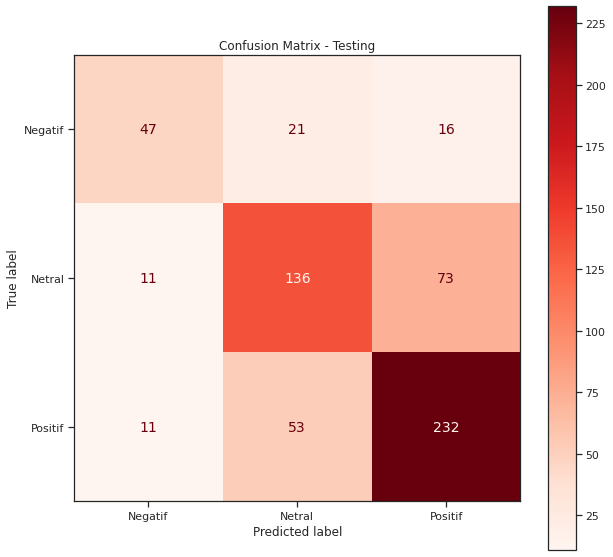

In [ ]:
#Selanjutnya, akan dianalisis lebih lanjut melalui confusion matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 14})
class_names = ["Negatif", "Netral", "Positif"]
disp = plot_confusion_matrix(ensemble, x_test, y_test, display_labels=class_names, cmap=plt.cm.Reds, ax=ax)# , normalize='true'
disp.ax_.set_title("Confusion Matrix - Testing")
print(disp.confusion_matrix)

Dari confusion matrix dengan data testing di atas, dapat dilihat melalui nilai diagonal matriks tersebut, bahwa nilai prediksi benar yang diberikan model ensemble sudah bagus. Data yang diprediksi benar sebanyak jumlah diagonalnya yaitu 415, dengan jumlah sentimen terbanyak dengan label positif. Hal ini menunjukkan bahwa adanya kecenderungan tanggapan positif terhadap piala dunia 2022. (hasil ini memiliki makna yang similar dengan confusion matrix pada data training sebelumnya).

**Kesimpulan analisis sentimen:**

Pada data tersebut akan dilakukan analisis sentimen. Analisis sentimen dilakukan untuk membangun sistem untuk mengenali dan mengekstraksi opini dalam bentuk teks. Data yang digunakan berasal dari twitter dengan kurang lebih 13.000 data yang diambil. Topik data tersebut mengenai Piala Dunia 2022. Pada proses analisis tersebut data menjelaskan opini masyarakat mengenai piala dunia 2022 lalu akan dibagi opini tersebut menjadi 3 yaitu bentuk positif, netral, dan negatif. Dilakukan pengukuran akurasi dan perbandingan perhitungan akurasi dari beberapa metode dengan hasil bahwa akurasi ensemble lebih baik daripada yang lain yaitu sebesar 0.69. Artinya, dengan pelabelan data tentang opini tersebut cukup akurat. 

Pada confusion matrix, terdapat true tabel dan predicted label dengan opini positif tertinggi. Artinya, selama piala dunia banyak opini positif baik sektor individu maupun non-individu seperti pemerintah dan media saat kejadian berlangsung bahkan setelah piala dunia 2022 selesai digelar. Hal ini berarti jika pada bidang ekonomi seperti promosi produk dan layanan bisa dilakukan dengan berhubungan dengan piala dunia. Contoh promosi yaitu dilakukan promo diskon pada produknya, membuat barang-barang yang berhias piala dunia, promosi ke media sosial dan lain-lain.

# Social Network Analysis

In [ ]:
#import beberapa modul yang dibutuhkan
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !mkdir data

    !pip install spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install unidecode twython beautifulsoup4 pyLDAvis json_lines
    !pip install networkx scipy
    !pip install --upgrade tweepy
    !python -m spacy download xx_ent_wiki_sm
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-12-29 15:18:18--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8834 (8.6K) [text/plain]
Saving to: ‘taudataEDA02CTA.py’

taudataEDA02CTA.py  100%[===================>]   8.63K  --.-KB/s    in 0s      

2022-12-29 15:18:18 (75.8 MB/s) - ‘taudataEDA02CTA.py’ saved [8834/8834]

--2022-12-29 15:18:18--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26207

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
import graphviz, taudata_sna as tau
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx 
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from graphviz import Digraph
import networkx as nx
import re

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
#import data
data = pd.read_csv('https://raw.githubusercontent.com/HanaAdzania/UAS-Datmin-2022/main/data_pialadunia1.csv',low_memory = False, encoding='utf8')
data1 = data.rename({'username': 'user'}, axis=1)
data_sna = data1[['user', 'tweet']]
data_sna.head()

,user,tweet
0,ChelseafanIndo,Para pemain Timnas Maroko beserta Ibunya diund...
1,warna_nusa,"Update Ranking FIFA Usai Piala Dunia 2022, Arg..."
2,detikhot,Messi mencetak rekor baru di Instagram. Postin...
3,iamkalong,@FaktaSepakbola Perjalanan Timnas Maroko di Pi...
4,TheMan16808645,"@FaktaSepakbola Dari 4 besar piala Dunia 2022,..."


In [ ]:
#Bentuk graph
users = data_sna['user'].tolist()
tweets = data_sna['tweet'].tolist()
print(users[:5])
print(tweets[:5])

['ChelseafanIndo', 'warna_nusa', 'detikhot', 'iamkalong', 'TheMan16808645']
['Para pemain Timnas Maroko beserta Ibunya diundang oleh Raja Maroko untuk merayakan hasil pencapaian mereka di Piala Dunia 2022.  https://t.co/WuDAiLIZQJ', 'Update Ranking FIFA Usai Piala Dunia 2022, Argentina dan Prancis Tempel Brasil   #FIFAWorldCup #PialaDunia2022   https://t.co/Ga6h2GOxMU', 'Messi mencetak rekor baru di Instagram. Postingan kemenangan tim Argentina di Piala Dunia 2022 menjadi postingan dengan like terbanyak di Instagram.  https://t.co/kJtoJiJue3', '@FaktaSepakbola Perjalanan Timnas Maroko di Piala Dunia 2022 positif banget, banyak cerita indah yang mereka tulis, jadi contoh baik buat banyak orang, serta berhasil merepresentasikan wajah Islam kepada dunia 👏❤', '@FaktaSepakbola Dari 4 besar piala Dunia 2022, cuma prancis kyknya yg ga ngelakuin parade atau semacamnya. Krn argentina, kroasia dan maroko pada parade semua']


### Centrality Analysis

Please wait, building Graph .... 


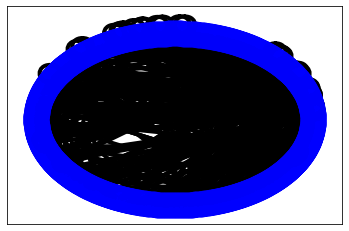

Finished. There are 5536 nodes and 1141 edges in the Graph.


In [ ]:
G = tau.Graph([users,tweets], Label = False, layOut='circular', plain=True) 

In [ ]:
#centrality by degree
Gt = tau.Centrality(G, N=7, method='degree', Label = True, layOut = 'spring')

Influencial Users: ['idextratime', 'erickthohir', 'FIFAWorldCup', 'YouTube', 'tribunnews', 'vidio', 'FaktaSepakbola']
Influencial Users Scores: [0.01192412 0.00578139 0.00523939 0.00415537 0.0034327  0.00307136
 0.00307136]


*Centrality by degree* menunjukkan tingkat tingginya sentralitas dari aktor (dalam hal ini user). Tujuh user yang memiliki tingkat sentralitas tertinggi yaitu user 'idextratime', 'erickthohir', 'FIFAWorldCup', 'YouTube', 'tribunnews', 'vidio', dan 'FaktaSepakbola'. Ketujuh user ini dapat dikatakan memiliki jangkauan terluas atau paling populer atau paling banyak dimention dalam cuitan yang membahas topik Piala Dunia 2022 selama turnamen tersebut berlangsung.

Untuk visualisasi yang lebih baik, akan digunakan aplikasi Gephi. Sebelumnya, data akan dieskport ke dalam format GexF terlebih dahulu.

In [ ]:
# Graph Kosong Baru
G = nx.Graph() 

G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  5009
Banyak Edges =  0


In [ ]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  5536
Banyak Edges =  1141


In [ ]:
#Export data ke file GexF
from google.colab import files
print("Export file ke GexF untuk diimport ke Gephi")
nx.write_gexf(G, "Piala Dunia 2022.gexf")

Export file ke GexF untuk diimport ke Gephi


Hasil visualisasi

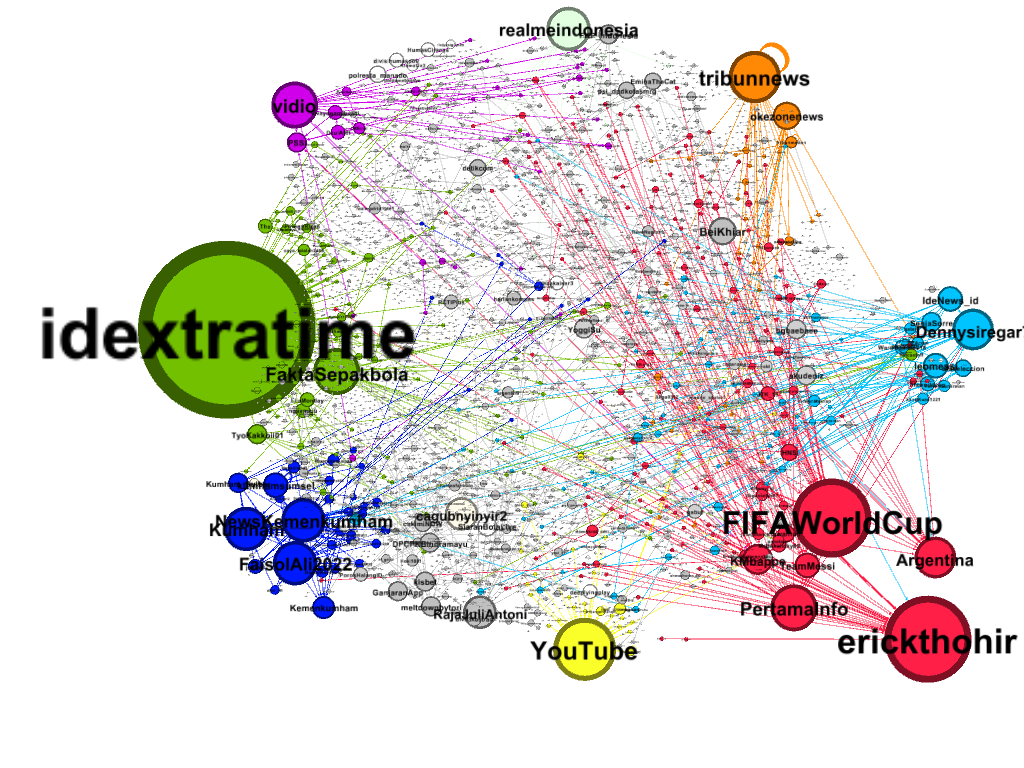

Perhatikan perbedaan ukuran dan warna masing-masing node. Ukuran node dirangking berdasarkan *degree*-nya, semakin besar *degree* user tersebut, semakin besar pula ukuran node nya. Perbedaan warna nodes menunjukkan kelompok *network* (jaringan) dimana pada gambar di atas ditunjukkan tujuh kelompok jaringan terbesar di dalam graph dimana:
*   Kelompok hijau merupakan user yang membuat cuitan atau berbagai macam berita tentang piala dunia, mulai dari jadwal, pertandingan, hasil, pemain, wasit, dll (info campuran)
*   Kelompok biru merupakan user yang membuat cuitan yang berkaitan dengan Kakanwil kemenkumham Faisol Ali tentang dukungannya terhadap negara jagoannya (kumpulan akun-akun kemenkum)
*   Kelompok merah merupakan user yang membahas Argentina dan Leonel Messi
*   Kelompok biru muda merupakan user yang membahas perdebatan Piala Dunia 2018 dan 2022
*   Kelompok jingga merupakan user yang memuat berita final Piala Dunia 2022 dan bahasan seputar timnas Argentina (kumpulan akun-akun berita)
*   Kelompok kuning merupakan user yang memuat link-link video YouTube seputar piala dunia 2022 (promosi video)
*   Kelompok ungu merupakan user yang membahas prediksi skor pertandingan.












In [ ]:
#centrality by betweeness
Gt = tau.Centrality(G, N=7, method='betweeness', Label = True, layOut = 'spring')

Influencial Users: ['idextratime', 'FIFAWorldCup', 'aabelajar', 'PertamaInfo', 'Argentina', 'erickthohir', 'vidio']
Influencial Users Scores: [0.00262127 0.00258392 0.00179585 0.00137071 0.00090237 0.0008867
 0.00064984]


*Centrality by betweeness* menunjukkan seberapa besar kemungkinan aktor (dalam hal ini user) menjadi penghubung antara dua aktor didalam jaringan. Tujuh user yang memiliki nilai *betweeness centrality* tertinggi yaitu user 'idextratime', 'FIFAWorldCup', 'aabelajar', 'PertamaInfo', dan 'Argentina', 'erickthohir', dan 'vidio'. Ketujuh user ini dapat dikatakan yang paling sering menjadi penghubung antar user lain dalam cuitan yang membahas topik Piala Dunia 2022 selama turnamen tersebut berlangsung.

Hasil visualisasi di Gephi
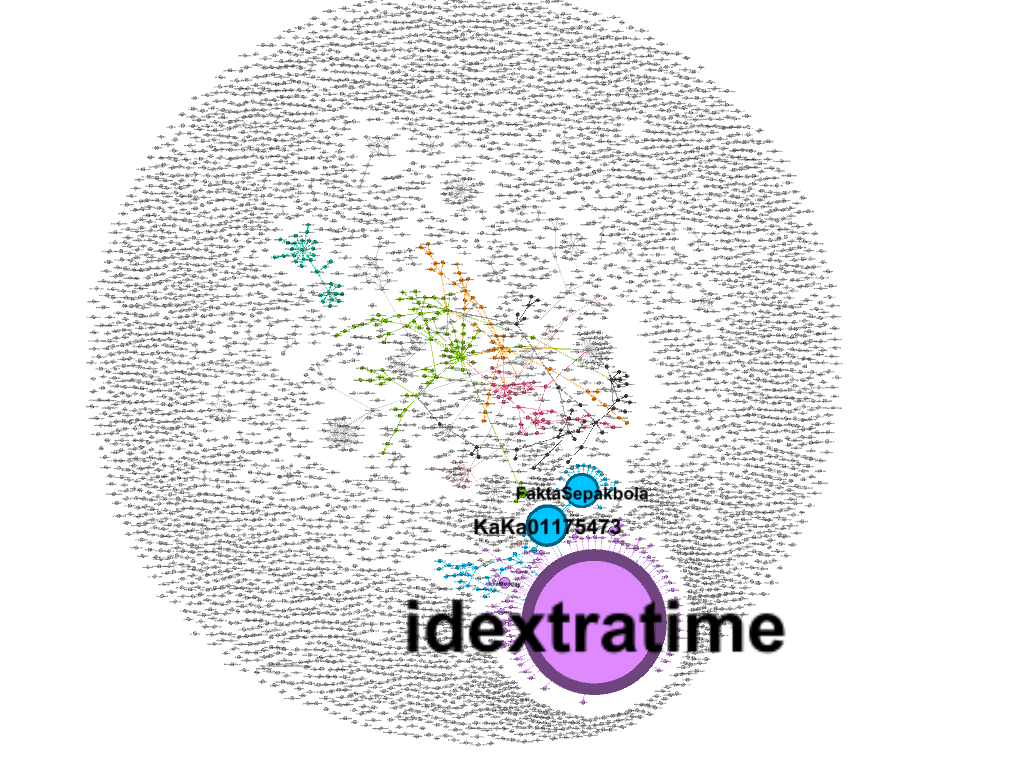

Perhatikan perbedaan ukuran dan warna masing-masing node. Ukuran node dirangking berdasarkan nilai *centrality betweeness*-nya, semakin besar nilai *centrality betweeness* user tersebut, semakin besar pula ukuran node nya. Perbedaan warna nodes menunjukkan kelompok *network* (jaringan) dimana pada gambar di atas ditunjukkan dua kelompok jaringan yang paling jelas di dalam graph, dimana:
*   Kelompok ungu berisi cuitan atau berbagai macam berita tentang piala dunia, mulai dari jadwal, pertandingan, hasil, pemain, wasit, dll (info campuran)
*   Kelompok biru membahas kemenangan Argentina dan berita tentang pemainnya.

In [ ]:
#centrality by closeness
Gt = tau.Centrality(G, N=7, method='closeness', Label = True, layOut = 'spring')

Influencial Users: ['FIFAWorldCup', 'PertamaInfo', 'aabelajar', 'idextratime', 'PSSI', 'disway_id', 'meauly']
Influencial Users Scores: [0.02018055 0.01893889 0.01868778 0.01785306 0.01693838 0.0169063
 0.01680024]


*Centrality by closeness* menunjukkan seberapa cepat aktor (dalam hal ini user) menjangkau user-user lain di dalam jaringan. Tujuh user yang memiliki nilai *closeness centrality* tertinggi yaitu user 'FIFAWorldCup', 'PertamaInfo', 'aabelajar', 'idextratime', 'PSSI', 'disway_id', dan 'meauly'. Hal ini berarti cuitan ketujuh user tersebut menyebar paling cepat di dalam jaringan yang membahas topik Piala Dunia 2022 selama turnamen tersebut berlangsung.

Hasil visualisasi di Gephi
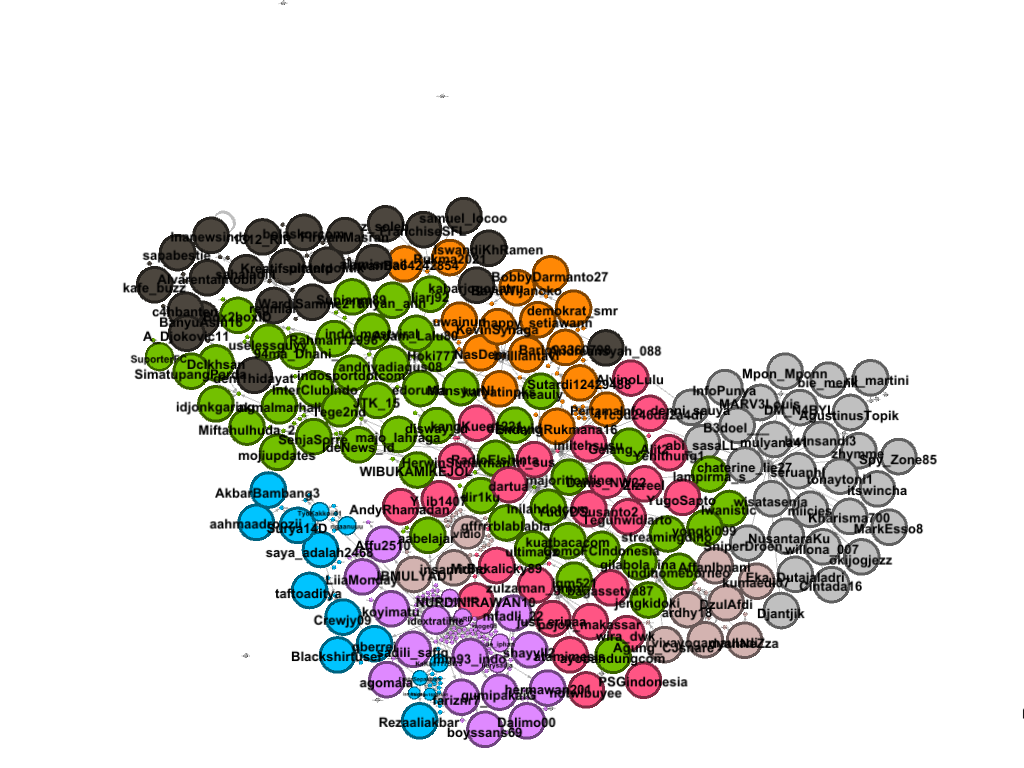

(**Gambar di atas hanya sebagian dari keseluruhan graph karena graph yang dihasilkan sangat menyebar, namun kelompok-kelompok jaringan berkumpul di area ini**).

Perhatikan perbedaan ukuran dan warna masing-masing node. Ukuran node dirangking berdasarkan nilai *centrality closeness*-nya, semakin besar nilai *centrality closeness* user tersebut, semakin besar pula ukuran node nya. Perbedaan warna nodes menunjukkan kelompok *network* (jaringan) dimana pada gambar di atas ditunjukkan dua kelompok jaringan yang paling jelas di dalam graph, dimana:
*   Kelompok ungu membahas juara-juara piala dunia pada berbagai edisi
*   Kelompok biru muda membahas euforia selama piala dunia 2022
*   Kelompok hijau berisi berbagai campuran berita seputar piala dunia 2022
*   Kelompok abu tua membahas hasil pertandingan final piala dunia 2022
*   Kelompok pink membahas kemenangan Argentina di final piala dunia 2022
*   Kelompok abu muda berisi cuitan yang me-*mention* Erick Tohir
*   Kelompok coklat muda membahas *Clossing Ceremony* Piala Dunia 2022
*   Kelompok jingga berisi cuitan tentang Argentina yang megnangkat piala kemenangan 









# Kesimpulan dan Insight

**Exploratory Data Analysis~Visualisasi Text**

1.   Argentina dan Perancis merupakan negara yang paling sering diperbincangkan saat babak final piala dunia
2.   Dari semua pemain kesebelasan tim Argentina dan Perancis, Messi dan Mbappe merupakan pemain yang paling mendominasi diperbincangkan netizen


**Topic Modelling**
1.   Topik pertama adalah mengenai kemenangan argentina dibawa oleh Messi, sang kapten. Dari sisi pelaku udaha/ekonomi, hal ini bisa dimanfaatkan dengan promosi usaha dengan topik kemenangan Argentina tersebut misal dengan diskon/atribut tentang tim pesepak bola tersebut. Kemudian, dari sisi negara Argentina, momen ini dapat dijadikan sebagai usaha untuk meningkatkan eksistensi negara tersebut dengan meningkatkan eskpor serta promosi budaya/pariwisata/hiburan yang ada sehingga dapat meningkatkan ekonomi negara.
2.   Media untuk menonton dan perancis, dapat dimanfaatkan oleh media untuk meningkatkan kepercayaan audience dan juga rating, dengan cara menjaga informasi atau berita yang disampaikan valid dan terpercaya. Untuk negara Perancis, hal ini dapat dimanfaatkan untuk menarik masyarakat internasional dalam meningkatkan promosi budaya/pariwisata/hiburan yang ada sehingga dapat meningkatkan ekonomi negara.
3.   Untuk Qatar sebagai penyelenggara piala dunia 2022,  keuntungan yang sudah didapatkan bisa dimanfaatkan bagi para pelaku usaha untuk ikut mempromosikan usaha nya di Qatar ataupun melakukan kerjasama. Selain itu, suksesnya negara Qatar menjadi negara penyelenggara piala dunia 2022 menjadikan Qatar sebagai negara yang dapat dipercaya oleh organisasi internasional untuk menyelenggarakan kejuaraan dunia lainnya.
4.   Semi-finalis Piala dunia 2022 yaitu Kroasia dan Moroko juga ikut mendapat perhatian besar dari publik. Hal ini dapat dimanfaatkan oleh pemerintah negara Kroasia dan Moroko untuk menarik masyarakat internasional dalam meningkatkan eksistensi negara tersebut dengan meningkatkan eskpor serta promosi budaya/pariwisata/hiburan yang ada sehingga dapat meningkatkan ekonomi negara.
5.   Secara umum, berkat terselenggaranya piala dunia tahun ini yang notabene hanya diselenggarakan 4 tahun sekali, topik mengenai sepak bola juga kembali memanas. Hal ini dapat dimanfaatkan oleh pengusaha alat dan pakaian olahraga untuk dapat melakukan promosi yang lebih besar pada bidang sepak bola untuk menarik pelanggan. Untuk organisasi pelatihan sepak bola, dapat melakukan promosi khusus terkait piala dunia untuk menarik lebih banyak anggota karena semakin banyak orang yang ingin ikut bermain sepak bola karena menonton piala dunia.

**Analisis Sentimen**
1. Pada  analisis sentimen didapatkan model terbaik yaitu model ensemble dengan akurasi cukup bagus yaitu 69%, artinya pelabelan data tentang opini tersebut cukup akurat. 
2. Piala dunia 2022 cenderung mendapatkan banyak tanggapan positif dari berbagai lapisan masyarakat, baik dari perorangan, pemerintah ataupun media saat kejadian berlangsung ataupun bahkan setelah piala dunia 2022 selesai digelar. 
3. Momentum ini dapat dimanfaatkan dari sudut pandang ekonomi seperti promosi produk dan layanan bisa dilakukan dengan berhubungan dengan piala dunia. Contoh promosi yaitu dilakukan promo diskon pada produknya, membuat barang-barang yang berhias piala dunia, promosi ke media sosial, mengikuti pameran usaha di Qatar dan lain-lain.
4. Dari sudut pandang penyelenggara /tuan rumah piala dunia 2022 (Qatar) akan lebih baik jika momen ini dimanfaatkan untuk makin mengenalkan Qatar pada dunia (misal dari segi pariwisata, dengan meningkatkan promosi, layanan atau hiburan yang ada), sehingga diharapkan dapat mengundang lebih banyak investor asing ataupun kerja sama dengan berbagai negara.


**Social Network Analysis**


1.   Dari hasil *centrality analysis* didapat beberapa user yang menjadi pusat cuitan (paling *influential*) yaitu user 'idextratime', 'ericktohir'. 'FifaWorldCup', 'YouTube', 'tribunnews', dan ''vidio'. User-user ini dapat dimanfaatkan sebagai sarana promosi dengan memasang sponsor/iklan melalui akun mereka.
2.   Dua kelompok jaringan terbesar:
      *   Kelompok hijau menunjukkan bahwa berita mengenai jadwal pertandingan, jalannya pertandingan, hasil, dan pemain di Piala Dunia 2022 sangat mendominasi. Hal ini dapat dimanfaatkan untuk memasang iklan/promo dengan topik-topik yang menyinggung piala dunia 2022. Dari sisi media massa/berita dapat memanfaatkan momen ini dengan terus mengeluarkan konten tentang piala dunia 2022 untuk meningkatkan jumlah pembaca beritanya, rating, dan sebagainya.

      *   Kelompok merah didominasi dengan bahasan seputar Leonel Messi dan Argentina, dari sisi ekonomi/pelaku usaha dapat menjadikan Leonel Messi/Argentina sebagai tema/topik dalam promosi usaha, sebagai contoh menggunakan mereka sebagai model iklan ataupun menyediakan produk/usaha yang berhubungan dengan mereka.
3. Terdapat dua user pejabat pemerintahan yang paling banyak di-*mention* dalam cuitan yang membahas Piala Dunia 2022 yaitu Menteri BUMN Erick Tohir dan Kakanwil Kemenkumham Sulawesi Barat Faisol Ali. Hal ini dikarenakan kedua user tersebut melakukan kegiatan atau mengeluarkan ujaran yang berkaitan dengan piala dunia 2022. Erick Tohir melakukan kegiatan seperti berfoto dengan pemain terkenal, berujar tentang grup jagoannya, dll. Demikian juga dengan Faisol Ali yang mengapresiasi pelaksanaan nonton bareng Piala Dunia 2022 di salah satu lapas Sulawesi Barat. Secara tidak langsung hal ini menimbulkan keingintahuan masyarakat mengenai siapa tokoh pejabat tersebut, apa instasinya dan dapat menimbulkan kesan positif kepada tokoh pejabat tersebut. Hal ini dapat dijadikan contoh oleh pejabat maupun instansi pemerintah lainnya.

**Kesimpulan**

Dari hasil analisis-analisis yang telah dilakukan didapatkan kesimpulan sebagai berikut :

*   Popularitas dan banyaknya tanggapan positif pada Piala Dunia 2022, baik dari popularitas  negara-negara yang meningkat (Argentina, Qatar, Prancis) ataupun para pemain (Messi dan Mbappe) dapat dimanfaatkan dari segi ekonomi (pelaku usaha), pariwisata, ataupun mengenalkan budaya suatu negara. Misal dengan menjadikan Messi ataupun Mbappe sebagai model iklan usaha/duta organisasi tertentu, sehingga diharapkan dapat meningkatkan profit bagipara pelaku usaha atau meningkatkan dukungan terhadap organisasi internasional tersebut.
*   Pihak media disarankan dapat memanfaatkan momen ini untuk meningkatkan rating dengan meningkatkan konten-konten berkaitan Piala Dunia 2022
*   Dari sisi politik , hal ini dapat dijadikan sebagai ajang untuk meningkatkan keingintahuan masyarakat terhadap suatu tokoh, pejabat (sarana pengenalan/kampanye) ataupun sebagai ajang kekompakkan sehingga dapat meningkatkan etos kerja






# Catatan : Peran & Kontribusi Anggota Kelompok

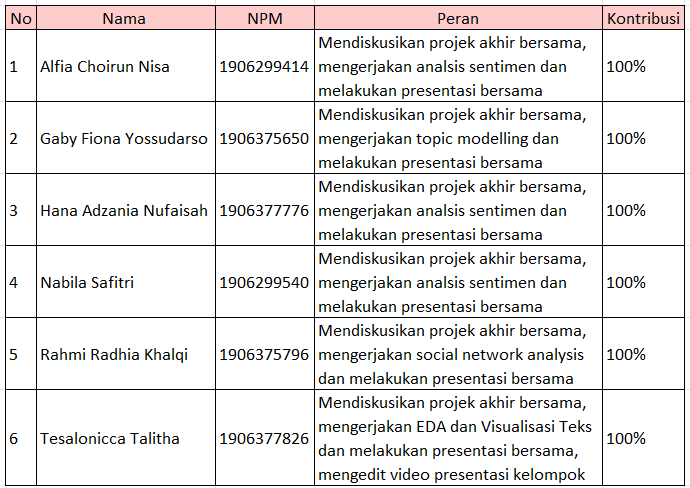

# Terima Kasih